<a href="https://colab.research.google.com/github/NataliaGon/kpi/blob/math-models/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


num = [1, -1, 1, -1]   # p³ - p² + p - 1
den = [1, 0, 1, 4]     # p³ + p + 4

# Ооб’єкт передатної функції
system = signal.TransferFunction(num, den)
print(system)


TransferFunctionContinuous(
array([ 1., -1.,  1., -1.]),
array([1., 0., 1., 4.]),
dt: None
)


In [ ]:
z, p, k = signal.tf2zpk(num, den)
print("Нулі:", z)
print("Полюси:", p)
print("Коефіцієнт підсилення:", k)


Нулі: [1.00000000e+00+0.j 7.77156117e-16+1.j 7.77156117e-16-1.j]
Полюси: [ 0.68939835+1.55750129j  0.68939835-1.55750129j -1.3787967 +0.j        ]
Коефіцієнт підсилення: 1.0


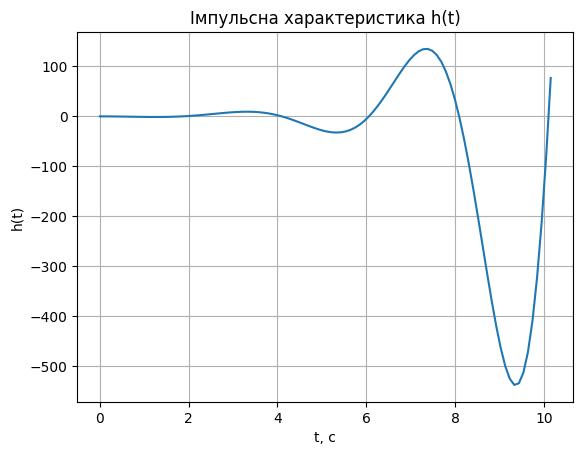

In [ ]:
t, h = signal.impulse(system)
plt.plot(t, h)
plt.title("Імпульсна характеристика h(t)")
plt.xlabel("t, c")
plt.ylabel("h(t)")
plt.grid()
plt.show()


Імпульсна характеристика системи, тобто відгук системи на короткий одиничний імпульс на вході (δ(t)).

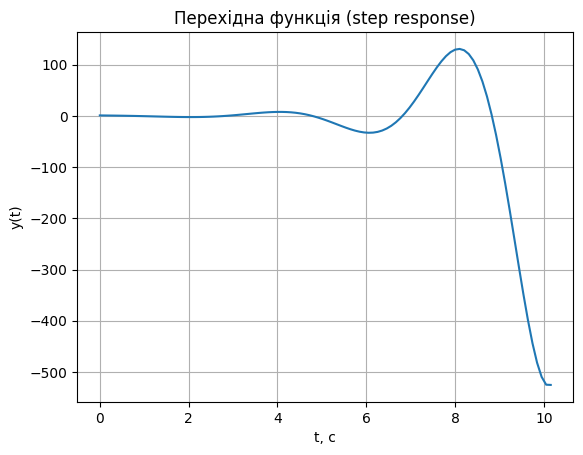

In [ ]:
t, y = signal.step(system)
plt.plot(t, y)
plt.title("Перехідна функція (step response)")
plt.xlabel("t, c")
plt.ylabel("y(t)")
plt.grid()
plt.show()


Вона показує, як система реагує на одиничний стрибок сигналу (u(t)) — тобто коли на вхід подається «1» після t=0.
Функція signal.step(system) обчислює реакцію системи y(t) на вхідний сигнал типу одинична сходинка u(t). 1/s

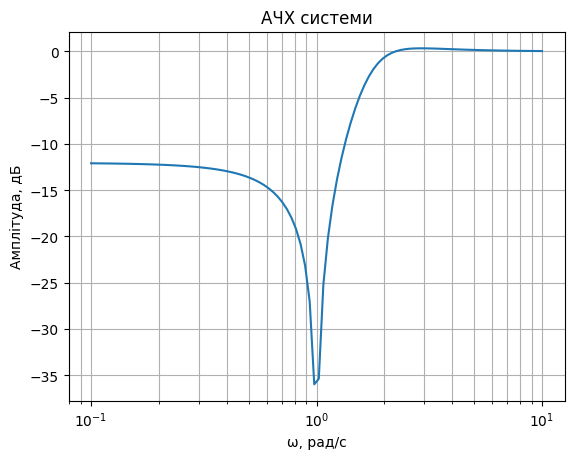

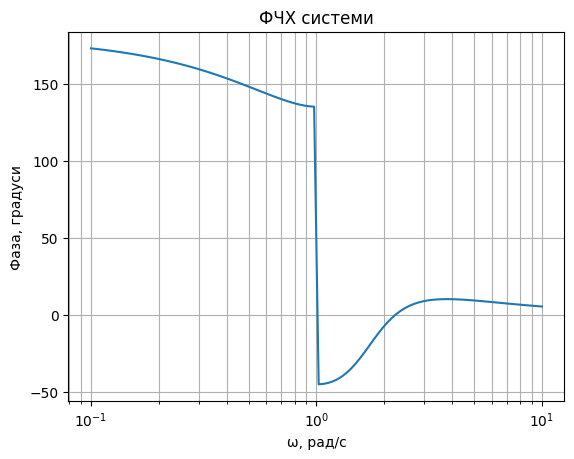

In [ ]:
w = np.logspace(-2, 2, 500)
w, mag, phase = signal.bode(system)

plt.figure()
plt.semilogx(w, mag)
plt.title("АЧХ системи")
plt.xlabel("ω, рад/с")
plt.ylabel("Амплітуда, дБ")
plt.grid(which='both')

plt.figure()
plt.semilogx(w, phase)
plt.title("ФЧХ системи")
plt.xlabel("ω, рад/с")
plt.ylabel("Фаза, градуси")
plt.grid(which='both')
plt.show()


np.logspace(-2, 2, 500) → створює 500 точок для частоти ω від
10(−2) до 10(2) рад/с (тобто від 0.01 до 100).

signal.bode(system) обчислює для цих частот:

mag — амплітуду в децибелах (20·log₁₀|G(jω)|),

phase — фазу у градусах (∠G(jω)).

АЧХ (амплітудно-частотна характеристика)-показує, як система послаблює або підсилює сигнали різної частоти.

ФЧХ (фазо-частотна характеристика) показує, як сильно вихід відстає (або випереджає) вхідний сигнал для кожної частоти.

на АЧХ — різке зростання амплітуди (крива йде вгору або має різкий пік у певній частоті),

на ФЧХ — фаза швидко падає нижче −180°, що підтверджує нестійкість.

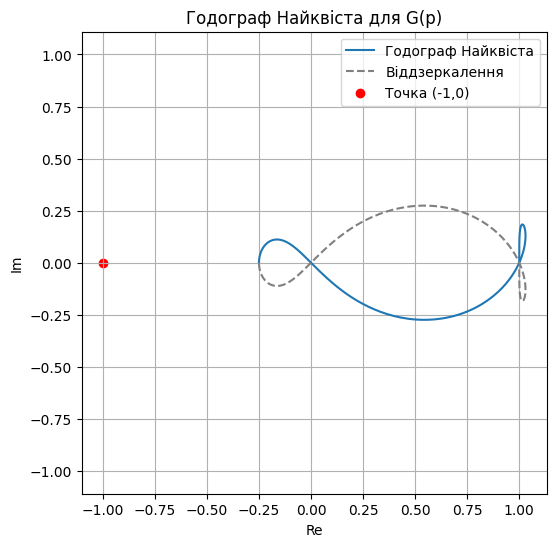

In [ ]:
system = signal.TransferFunction(num, den)

# Обчислення частотної характеристики
w = np.logspace(-2, 2, 1000)
w, H = signal.freqresp(system, w)

# Побудова годографа Найквіста
plt.figure(figsize=(6,6))
plt.plot(H.real, H.imag, label='Годограф Найквіста')
plt.plot(H.real, -H.imag, '--', color='gray', label='Віддзеркалення')
plt.scatter([-1], [0], color='red', label='Точка (-1,0)')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Годограф Найквіста для G(p)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()



Цей код будує годограф Найквіста — графік для перевірки стійкості системи.
На осі X — дійсна частин G(jω), на осі Y — уявна.
Синя крива показує, як система реагує на різні частоти.
Сіра пунктирна — дзеркальне відображення.
Червона точка (−1,0) — критична: якщо крива її охоплює, система нестійка; якщо ні — стійка.

In [ ]:
A, B, C, D = signal.tf2ss(num, den)
print("Матриця A:\n", A)
print("Матриця B:\n", B)
print("Матриця C:\n", C)
print("Матриця D:\n", D)


Матриця A:
 [[-0. -1. -4.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
Матриця B:
 [[1.]
 [0.]
 [0.]]
Матриця C:
 [[-1.  0. -5.]]
Матриця D:
 [[1.]]


# Висновки

Імпульсна й перехідна характеристики показали наявність коливань, що не затухають, — це свідчить про нестійкість системи.
На графіку АЧХ спостерігається різкий пік амплітуди, а на ФЧХ фаза проходить нижче за −180°, що також підтверджує нестійкість.
Годограф Найквіста проходить поблизу та частково охоплює критичну точку (−1, 0), тому за критерієм Найквіста система є нестійкою.

Реалізація у просторі станів у вигляді матриць A, B, C, D показала структуру трьохінтегральної системи.